# The Sparks Foundation
### Data Science And Business Analysis Internship



 # Sampda Ahuja - Grip August 2021

## Task 1 (Prediction Using Supervised ML)

### Simple Linear Regression
##### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



### Importing the required Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the Dataset

In [2]:
#importing data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

print("Data imported Successfully")

print(df.head(15))

Data imported Successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Plotting the Dataset to visualize The Dataset

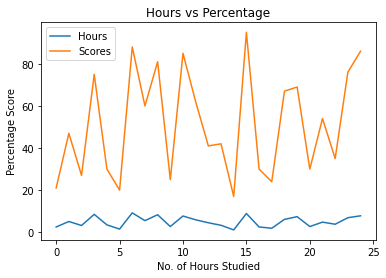

In [5]:
# Visualising the data using line plot
df.plot(kind="line" )
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

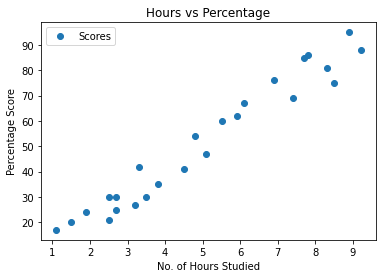

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing The Data
##### The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [16]:
X = df.iloc[:, :-1].values 
Y =  df.iloc[:, 1].values


In [17]:
from sklearn.model_selection import train_test_split  
X_train , X_test , Y_train , Y_test= train_test_split(X , Y , test_size=0.2 , random_state=0)

### Training The model Using Linear Regression
##### We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , Y_train)

print("Training completed successfully")

Training completed successfully


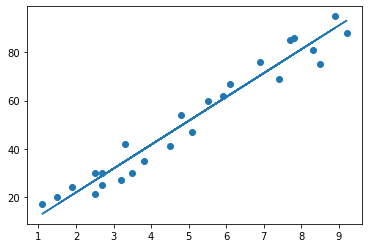

In [19]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Making predictions
##### Now that we have trained our algorithm, it's time to make some predictions.

In [20]:
# Testing data - In Hours
print(X_test)   

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Predicting the scores
y_pred = regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [28]:
# Comparing Actual vs Predicted
comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print(comparison)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [31]:
hours = 9.25
# reshaping the data 
hours = np.array(hours).reshape(-1,1)

own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### Evaluating the model
##### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.# 

In [32]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test,y_pred))

Mean Absolute Error: 4.183859899002975
